In [61]:
from pathlib import Path


input_ = Path("../data/day16/input_example.txt").read_text()

In [62]:

import re


regex = re.compile(r"Valve (\w+) has flow rate=(\d+); tunnels? leads? to valves? ([\w,\s]+)")

valves = dict()

for line in input_.splitlines():
    m = regex.match(line)
    assert m is not None
    valve = m.group(1)
    flow_rate = int(m.group(2))
    connected = m.group(3).split(", ")
    valves[valve] = (flow_rate, connected)

In [63]:
import networkx as nx

G = nx.Graph({v: conn for v, (fr, conn) in valves.items()})

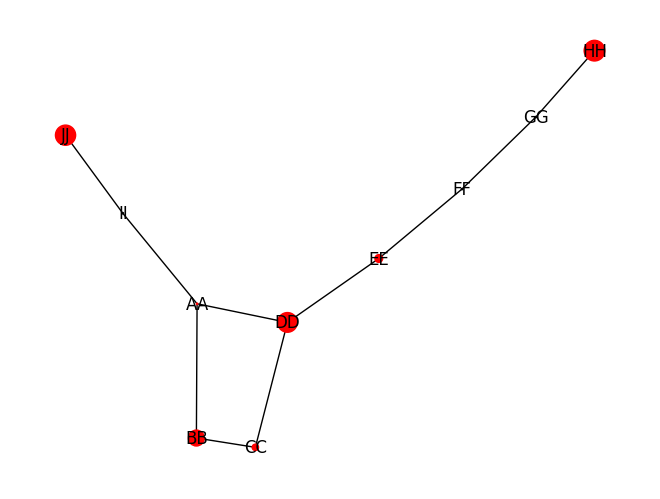

In [65]:
nx.draw(
    G,
    with_labels=True,
    nodelist=list(valves.keys()),
    node_size=[(10 * valves[v][0] + 1) for v in valves],
    node_color=["red" if valves[v][0] > 0 or len(valves[v][1]) > 2 else "black" for v in valves],
)